In [ ]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=71e7577808c3c7e6022de8b4b9ff9b8885dd787b6a76af43f1275fc83ea1dc4c
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.signal import butter, filtfilt
import numpy as np
from scipy.linalg import eigh
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

In [ ]:
from google.colab import files
import pandas as pd
import arff

uploaded = files.upload()


file_path = list(uploaded.keys())[0]

with open(file_path, 'r') as f:
    dataset = arff.load(f)

data = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Bước 5: Hiển thị thông tin dataset
print(data.head())


Saving EEG Eye State.arff to EEG Eye State.arff
       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4 eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85            0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10            0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23            0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41            0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46            0  


In [ ]:
data

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8      FC6       F4       F8      AF4 eyeDetection  
0      4222.05  4238.46  4211.28  4280.51  4635.90  4393.85            0  
1      4210.77  4226.67  4207.69  4279.49  4632.82  4384.10            0  
2      4207.69  4222.05  4206.67  4282.05  4628.72  4389.23            0  
3      4217.44  4235.38  4210.77  4287.69  4632.31  4396.41            0  
4      4210.77  4244.10  4212.82  4288.21  4632.82  4398.46            0  
...        ...      ...      ...      ...      ...      ...          ...  
14975  4203.08  4221.54  4171.28  4269.23  4593.33  4340.51            1  
14976  4194.36  4217.44  4162.56  4259.49  4590.26  4333.33            1  
14977  4193.33  4212.82  4160.51  4257.95  4591.79  4339.49            1  
14978  4200.00  4220.00  4165.64  4267.18  4596.41  4350.77            1  
14979  4212.31  4226.67  4167.69  4274.36  4597.95  4350.77            1  

[14980 rows x 15 columns]

In [ ]:
df = data

In [ ]:
# define sampling rate, time vector, and electrode list (columns list)
Fs = 128 # (number of samples / 117s length of data mentioned on the data description) rounded to the closest integer.
t = np.arange(0, len(df) * 1 / Fs, 1/Fs)
cols = df.columns.tolist()[:-1]

print( 'Number of null samples:\n' + str(df.isnull().sum()) )
df.head()

Number of null samples:
AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64


AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4 eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85            0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10            0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23            0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41            0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46            0

In [ ]:
# separate targets so you can preprocess the EEG data easily
Y = df['eyeDetection']
print( Y.shape )

X = df.drop(columns='eyeDetection')
print( X.shape )
X.head()

(14980,)
(14980, 14)


AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46

In [ ]:
def plot_data(X, xlim=[0, 20]):
    plt.figure(figsize=(15, 12))
    num_signals = len(X[0].columns.tolist())  # Số tín hiệu
    y_ticks = []  # Vị trí các nhãn trên trục y
    y_labels = []  # Nhãn của các tín hiệu

    for ind_data, data in enumerate(X):
        for ind, col in enumerate(data.columns.tolist()):
            y_offset = 5 * ind
            plt.plot(t, y_offset + stats.zscore(data[col], nan_policy='omit'),
                     linewidth=0.5 if ind_data == len(X) - 1 else 0.3,
                     alpha=1 if ind_data == len(X) - 1 else 0.6,
                     label=col if ind_data == len(X) - 1 else None,
                     color='k' if ind_data < len(X) - 1 else None)

            if ind_data == len(X) - 1:
                y_ticks.append(y_offset)  # Lưu vị trí để đặt nhãn
                y_labels.append(col)      # Lưu tên tín hiệu

    # Đặt nhãn cho trục y
    plt.yticks(y_ticks, y_labels)
    plt.xlim(xlim)
    plt.xlabel('Time (s)')
    plt.ylabel('Signals')
    plt.title('EEG Signals with Labels')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()


<ipython-input-13-f16b4851e176>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: np.nan if (abs(x) > 4) else x )
<ipython-input-13-f16b4851e176>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: np.nan if (abs(x) > 4) else x )


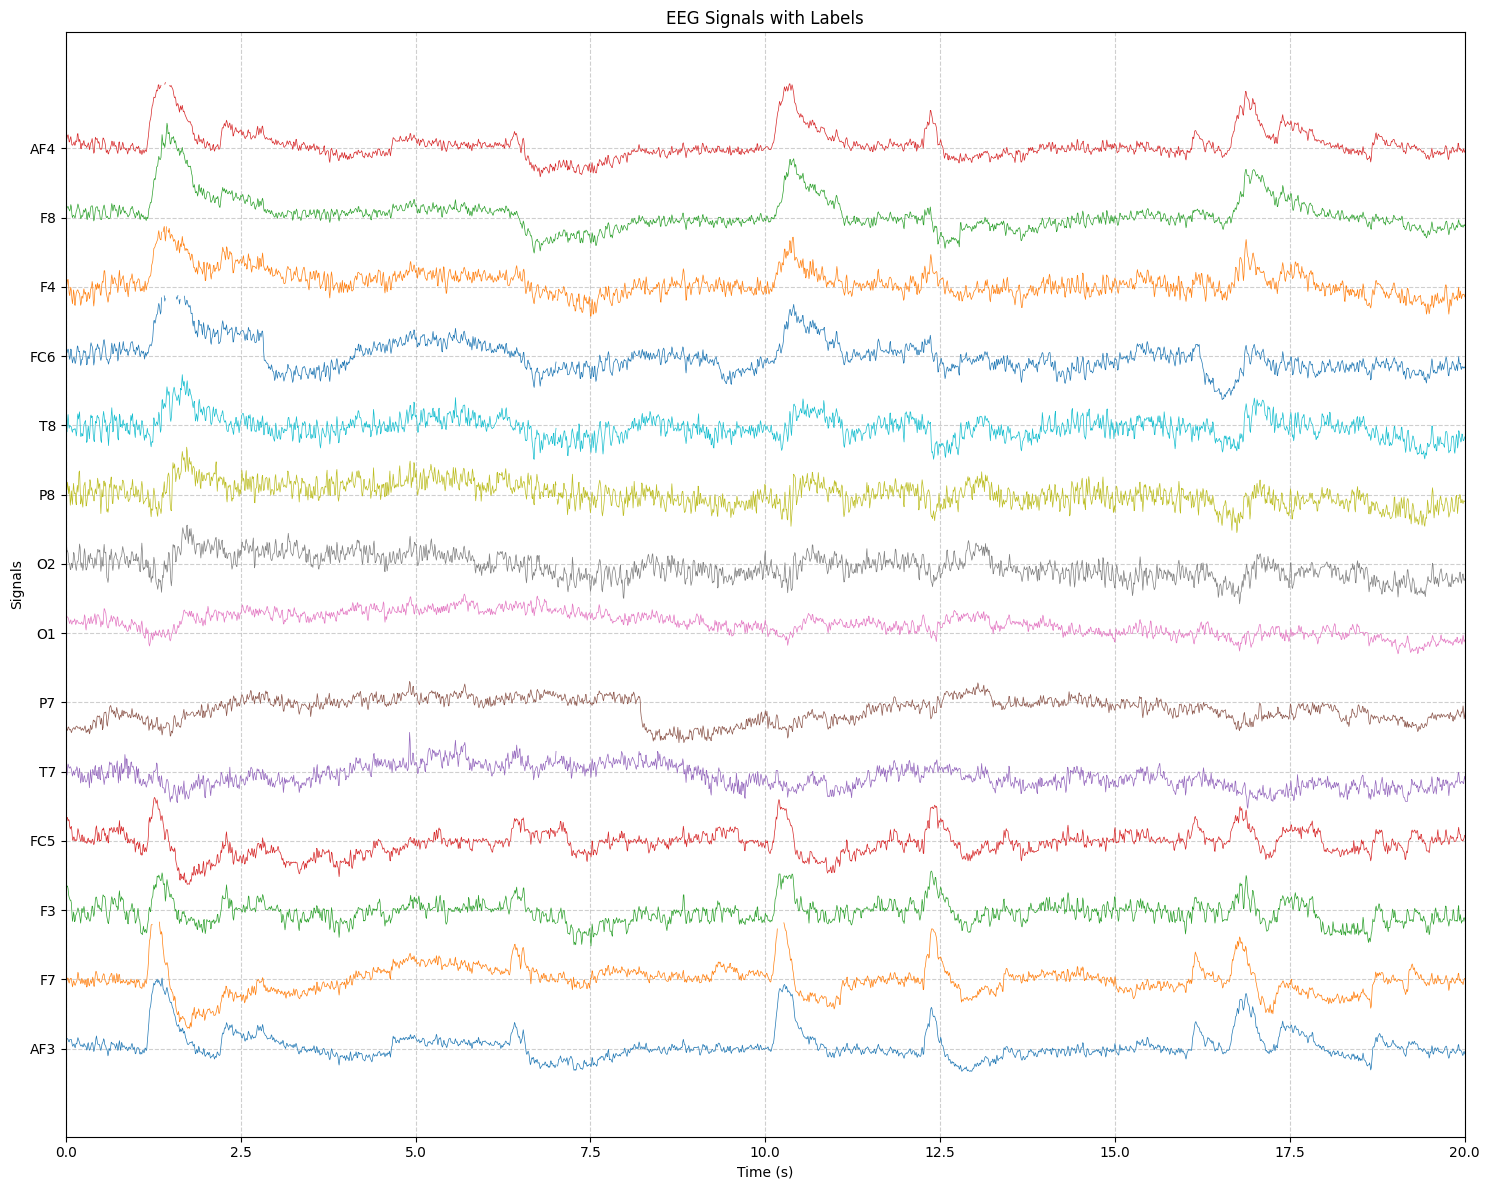

In [ ]:
# Find outliers and put Nan instead
X = X.apply(stats.zscore, axis=0)
X = X.applymap(lambda x: np.nan if (abs(x) > 4) else x )

# recalculate outliers with ignoring nans since the first calculation was biased with the huge outliers!
X = X.apply(stats.zscore, nan_policy='omit', axis=0)
X = X.applymap(lambda x: np.nan if (abs(x) > 4) else x )

plot_data([X])

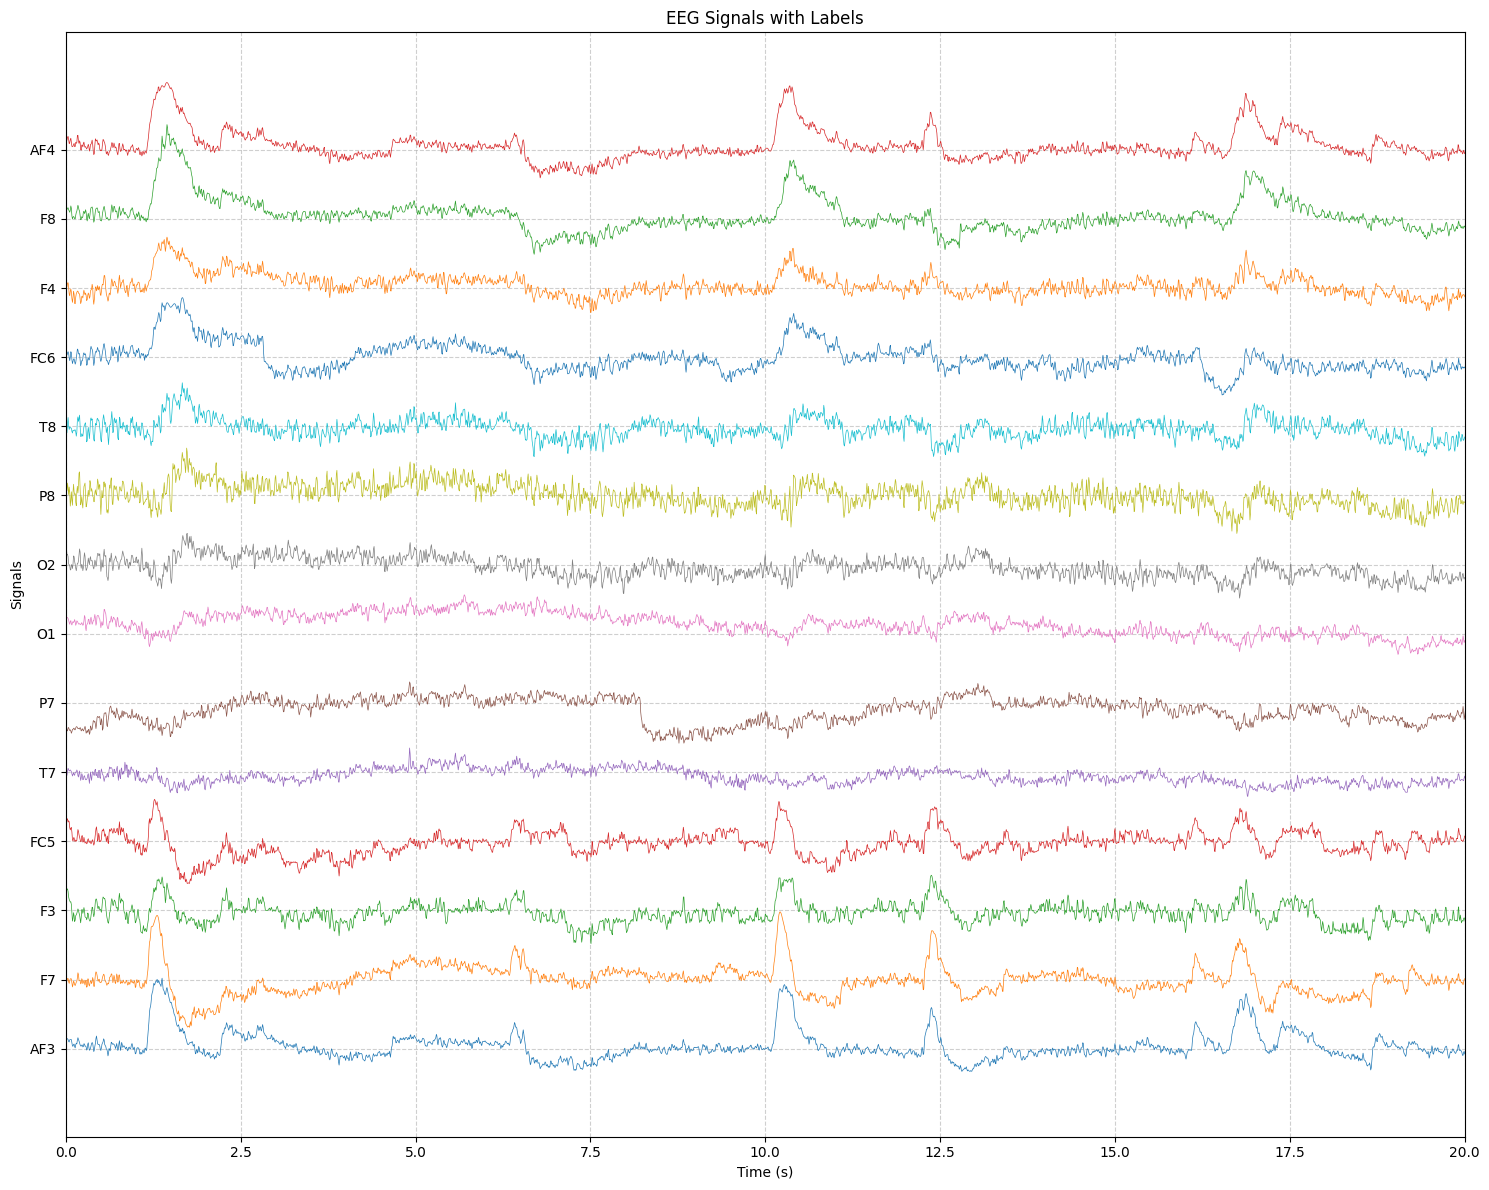

In [ ]:
from scipy import signal, interpolate

def interp(x):
    t_temp = t[ x.index[ ~x.isnull() ] ]
    x = x[ x.index[ ~x.isnull() ] ]
    clf = interpolate.interp1d(t_temp, x, kind='cubic')
    return clf(t)

# interpolate the nans using cubic spline method
X_interp = X.apply(interp, axis=0)

plot_data([X_interp])

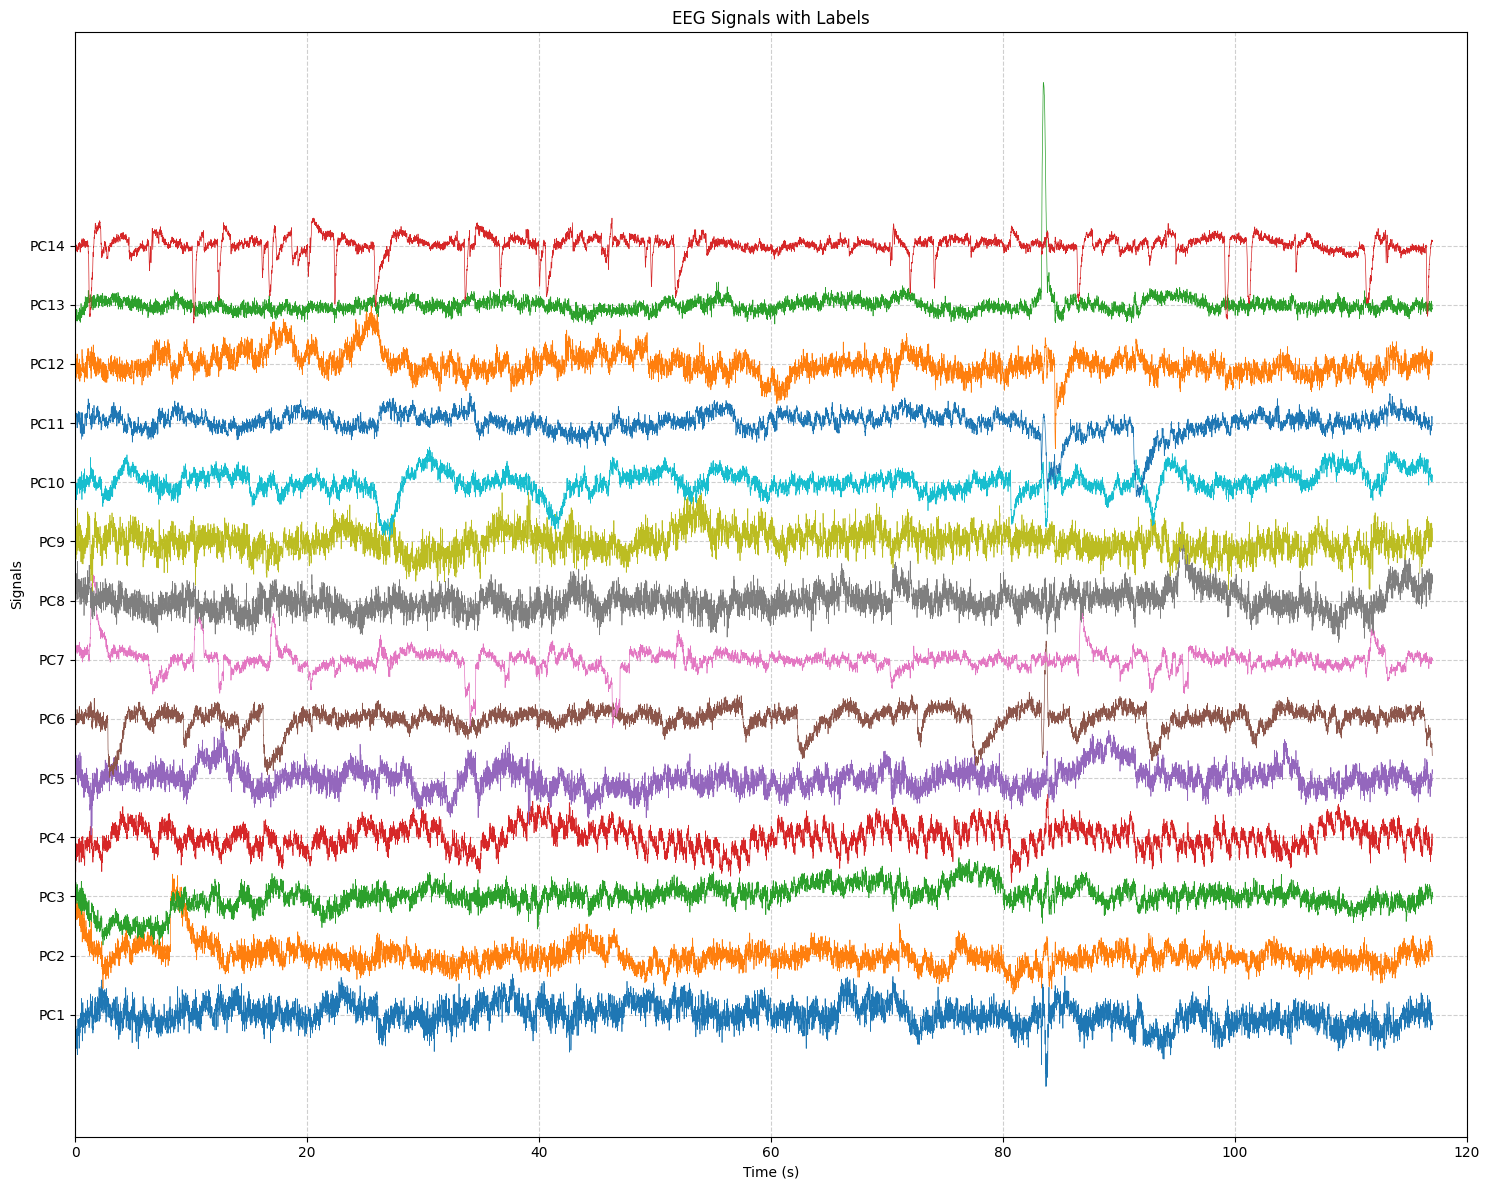

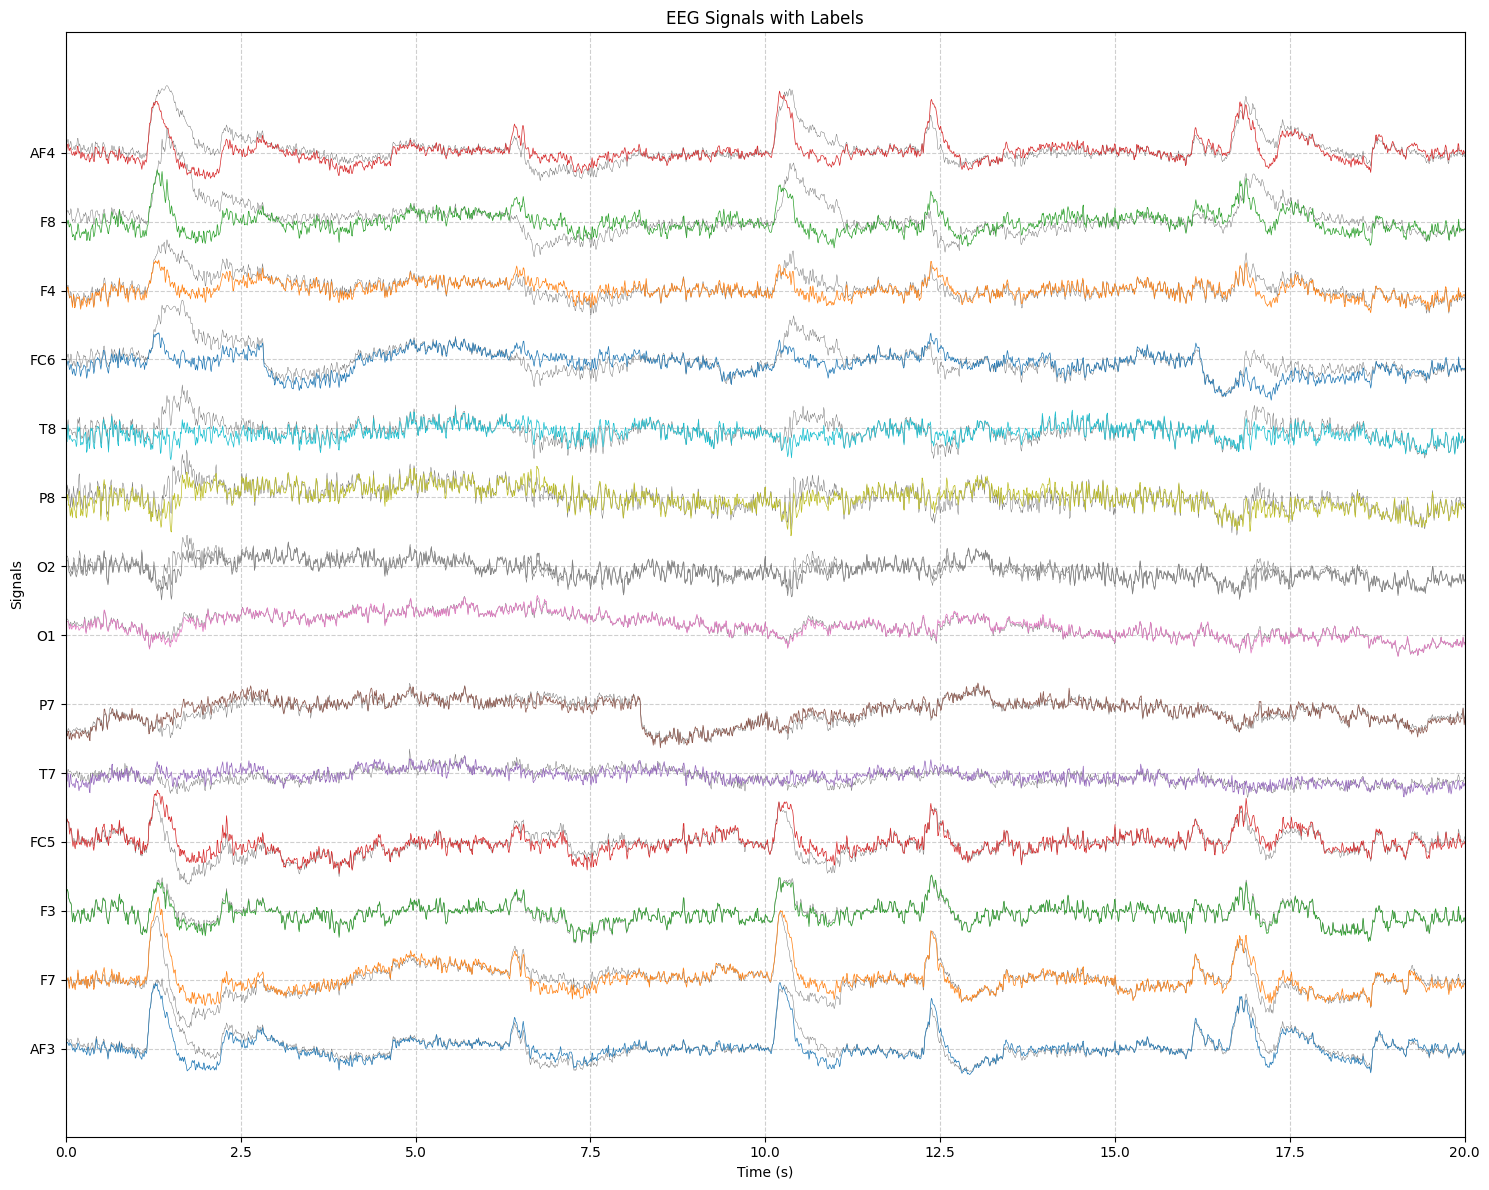

In [ ]:
# ICA
from sklearn.decomposition import FastICA

# apply ICA to drop non-electrophysiolgoical components (requires familiarity with EEG data)
ica = FastICA(max_iter=2000, random_state=0)
X_pcs = pd.DataFrame( ica.fit_transform(X_interp) )
X_pcs.columns = ['PC' + str(ind+1) for ind in range(X_pcs.shape[-1])]

plot_data([X_pcs], xlim=[0, 120])
X_pcs = X_pcs.drop(columns=['PC1', 'PC7'])
# reconstruct clean EEG after dropping the bad components
ica.mixing_ = np.delete(ica.mixing_, [0, 6], axis = 1)
X_interp_clean = pd.DataFrame( ica.inverse_transform(X_pcs) )
X_interp_clean.columns = cols

plot_data([X_interp, X_interp_clean], xlim=[0, 20])

In [ ]:
X_interp_clean.shape

(14980, 14)

In [ ]:
X_interp_clean = X_interp

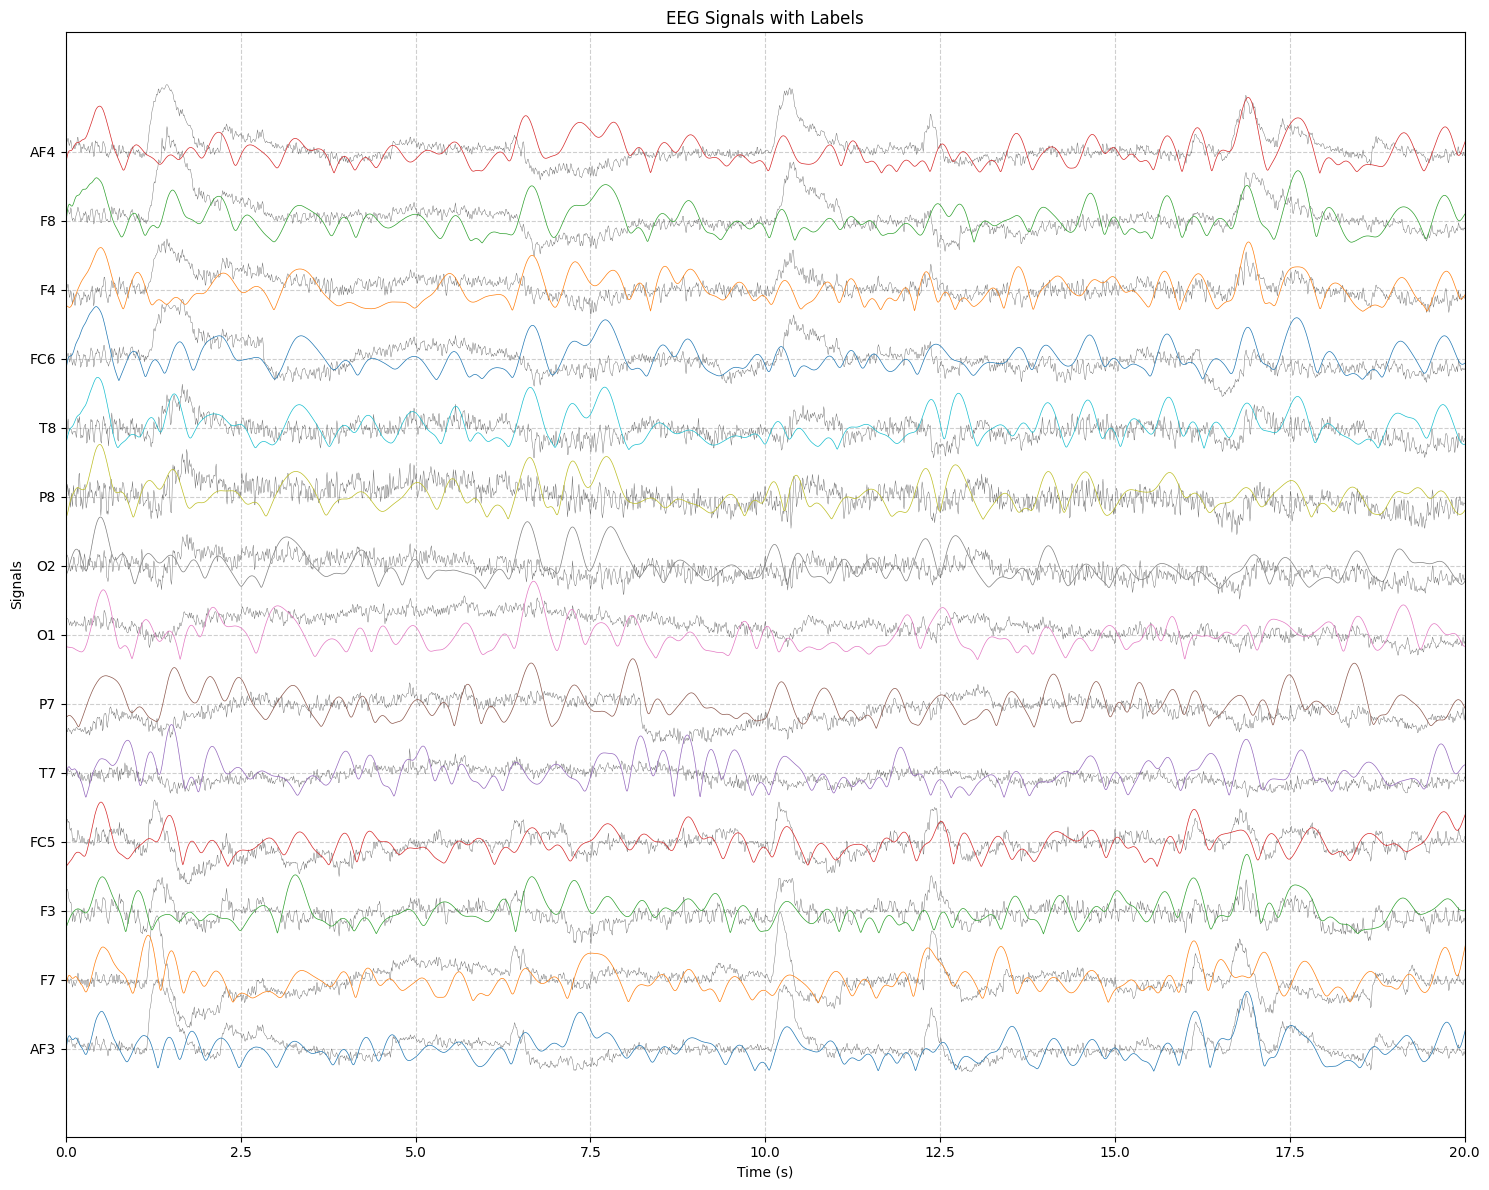

In [ ]:
# now that data is clean, extract alpha waves magnitude from the clean signals

# filter the data between 8-12 Hz (note that data has been rescaled to original scale after filtering for comparable visualization)
b, a = signal.butter(6, [8 / Fs * 2, 12 / Fs * 2], btype='bandpass')
X_interp_clean_alpha = X_interp_clean.apply(lambda x: signal.filtfilt(b, a, x) / max(abs(signal.filtfilt(b, a, x))) * max(abs(x)), axis=0)

# extract envelope of the Alpha waves
X_interp_clean_alpha = X_interp_clean_alpha.apply(lambda x: np.abs(signal.hilbert(x)), axis=0)
X_interp_clean_alpha.columns = cols

plot_data([X_interp_clean, X_interp_clean_alpha], xlim=[0, 20])

In [ ]:
X_interp_clean_alpha.shape

(14980, 14)

<Axes: >

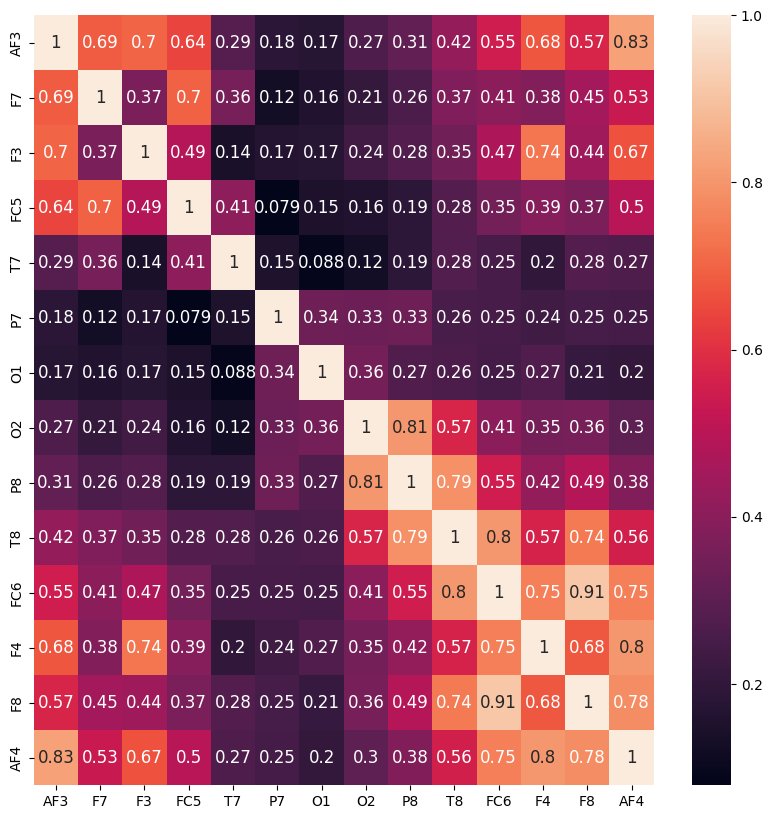

In [ ]:
# drop features with high correlations
X = X_interp_clean_alpha
Cols_corr = X.corr()

# plot correlations of the cols
plt.figure( figsize=(10,10) )
sns.heatmap(Cols_corr, annot=True, annot_kws={'fontsize':12})



In [ ]:
# train an SVM to classify
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# split train test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=48, test_size=0.2, stratify=Y, shuffle=True)

# normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Y = Y.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
# Define a function to compute CSP filters
def compute_csp(X, y, n_components=14):
    # Separate EEG trials for each class
    class_0 =np.transpose(X[y == 0])
    class_1 =np.transpose(X[y == 1])

    # Compute class-wise covariance matrices
    cov_0 = np.dot(class_0,np.transpose(class_0))/np.trace(np.dot(class_0,np.transpose(class_0)))
    cov_1 = np.dot(class_1,np.transpose(class_1))/np.trace(np.dot(class_1,np.transpose(class_1)))


    # Compute generalized eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(cov_0, cov_0 + cov_1)

    # Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select top CSP filters
    csp_filters = sorted_eigenvectors[:, :n_components]

    return csp_filters

In [ ]:
# Define a function to apply CSP filtering to EEG signals
def apply_csp(X, csp_filters):
    return np.dot(csp_filters.T, X.T).T  # Transpose X before applying filters and transpose the result back

# Compute CSP filters
csp_filters = compute_csp(X_train, y_train)
# Apply CSP filtering to training and testing data
X_train_csp = apply_csp(X_train, csp_filters)
X_test_csp = apply_csp(X_test, csp_filters)

Training Accuracy: 0.9994993324432577
Test Accuracy: 0.9966622162883845
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1651
           1       1.00      0.99      1.00      1345

    accuracy                           1.00      2996
   macro avg       1.00      1.00      1.00      2996
weighted avg       1.00      1.00      1.00      2996

Confusion Matrix:
[[1649    2]
 [   8 1337]]


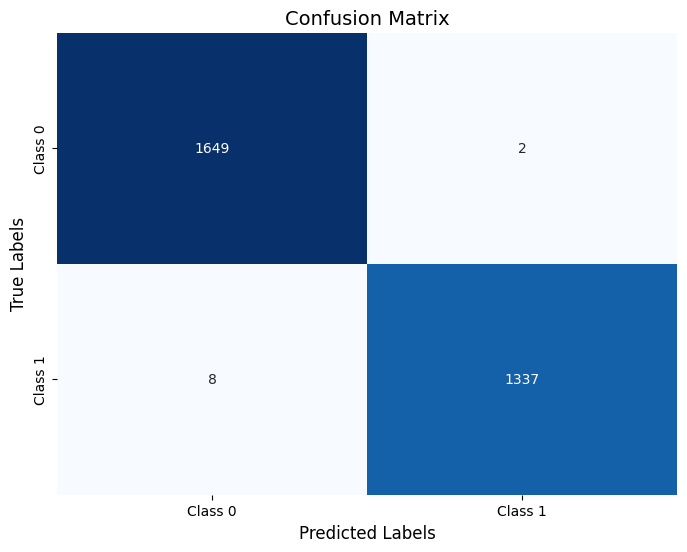

In [ ]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)  # You can adjust the number of neighbors as needed

# Train the KNN classifier on the CSP-filtered training data
knn_classifier.fit(X_train_csp, y_train)

# Make predictions on the CSP-filtered training data
y_train_pred = knn_classifier.predict(X_train_csp )

# Make predictions on the CSP-filtered test data
y_test_pred = knn_classifier.predict(X_test_csp)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate and print confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Vẽ heatmap cho ma trận confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])  # Đổi nhãn nếu cần

# Thêm nhãn và tiêu đề
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()


Training Accuracy: 0.9994993324432577
Test Accuracy: 0.9976635514018691
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1651
           1       1.00      1.00      1.00      1345

    accuracy                           1.00      2996
   macro avg       1.00      1.00      1.00      2996
weighted avg       1.00      1.00      1.00      2996

Confusion Matrix:
[[1648    3]
 [   4 1341]]


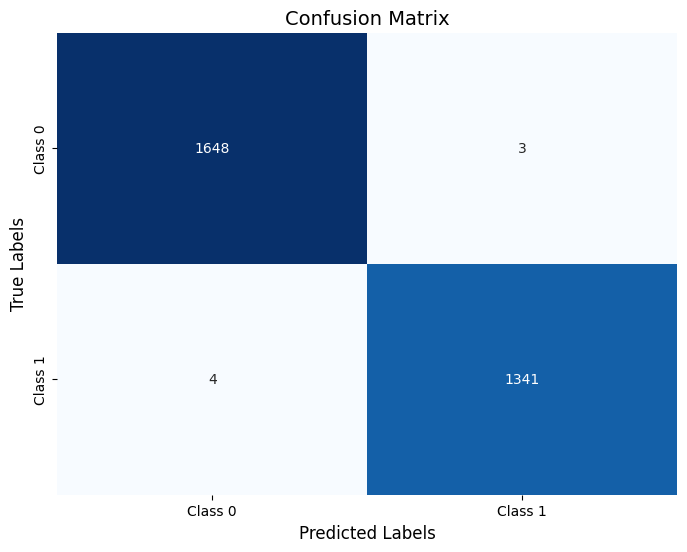

In [ ]:
from sklearn.metrics import roc_auc_score

# train with grid search
svc = SVC()
parameters = {'gamma': [0.1, 1, 10], 'C': [0.1, 1, 10]}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_csp, y_train)

# predict labels
y_test_pred = clf.predict(X_test_csp)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate and print confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Vẽ heatmap cho ma trận confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])  # Đổi nhãn nếu cần

# Thêm nhãn và tiêu đề
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Training Accuracy: 1.0
Testing Accuracy: 0.9943257676902537
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1651
           1       1.00      0.99      0.99      1345

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996

Confusion Matrix:
[[1646    5]
 [  12 1333]]


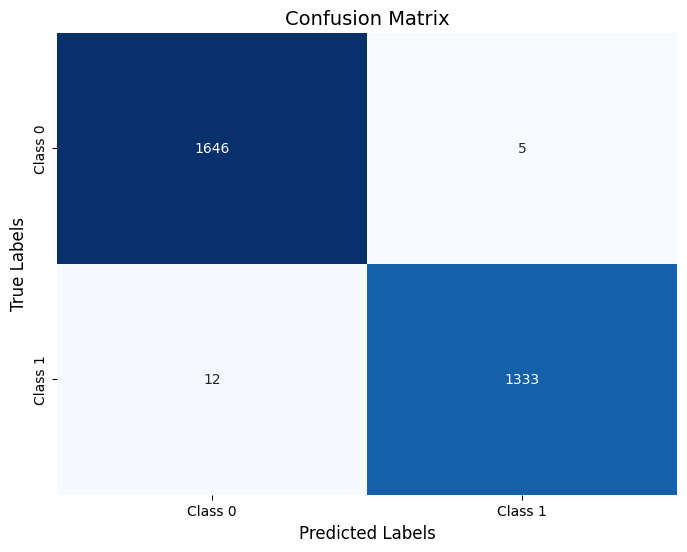

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the Random Forest classifier on the CSP-filtered training data
rf_classifier.fit(X_train_csp, y_train)

# Make predictions on the CSP-filtered training data
y_train_pred = rf_classifier.predict(X_train_csp)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the CSP-filtered test data
y_test_pred = rf_classifier.predict(X_test_csp)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))
# Calculate and print confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Vẽ heatmap cho ma trận confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])  # Đổi nhãn nếu cần

# Thêm nhãn và tiêu đề
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [ ]:
import joblib
from google.colab import files


joblib.dump(knn_classifier, 'knn_model.joblib')

files.download('knn_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Combine X and Y into one DataFrame
X_combined = pd.concat([pd.DataFrame(X_test_csp), y_test.reset_index(drop=True)], axis=1) # Convert X_train_csp to a DataFrame and reset index of y_train for proper alignment

# Save the combined DataFrame to an Excel file
output_file = '/content/eeg_data_combined.xlsx'
X_combined.to_excel(output_file, index=False)

# Download the Excel file to your local machine
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>